In [39]:
%pip install GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import GridSearchCV

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement GridSearchCV
ERROR: No matching distribution found for GridSearchCV


ModuleNotFoundError: No module named 'GridSearchCV'

In [3]:
df = pd.read_csv('practice1_data.csv')

In [4]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
0,2.163950,0.015729,-1.136593,2.182571,-1.552051,-0.909067,1.791084,-1.094894,0.308272,-0.912365,0
1,1.364464,-1.359741,-1.881798,-0.484231,-1.974301,-0.017010,2.184909,-1.012308,-0.774774,-3.702803,0
2,1.237133,0.945965,-0.008633,0.889645,0.348132,-1.863290,-1.093229,0.057705,1.646754,-0.834884,2
3,0.530019,2.739019,1.168152,-0.182967,-0.313546,1.274500,1.097952,-0.909685,1.490564,2.300722,1
4,-1.169403,-0.387841,0.049067,-2.136358,-1.839488,-0.635955,-0.136341,0.357952,-0.376029,-2.323494,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x1       1500 non-null   float64
 1   x2       1500 non-null   float64
 2   x3       1500 non-null   float64
 3   x4       1500 non-null   float64
 4   x5       1500 non-null   float64
 5   x6       1500 non-null   float64
 6   x7       1500 non-null   float64
 7   x8       1500 non-null   float64
 8   x9       1500 non-null   float64
 9   x10      1500 non-null   float64
 10  classes  1500 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 129.0 KB


In [6]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,classes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.550329,-0.275385,-0.383910,-0.017770,-0.044157,0.042072,0.056311,-0.244578,-0.083342,0.524397,1.497333
std,1.489842,1.711574,1.390968,0.976437,1.003190,1.013082,1.560251,1.594473,1.623737,1.558246,1.117807
min,-4.857101,-5.631583,-4.554755,-3.402785,-3.620247,-3.667087,-4.975684,-4.642937,-5.973969,-4.764986,0.000000
25%,-0.437339,-1.423198,-1.364413,-0.631979,-0.682299,-0.644789,-1.112853,-1.338483,-1.167791,-0.475189,0.000000
50%,0.601106,-0.427568,-0.462918,0.009628,-0.045481,0.057803,-0.064162,-0.432473,-0.119206,0.593918,1.000000
75%,1.566922,0.800646,0.522196,0.625042,0.660479,0.752421,1.215963,0.844740,0.886031,1.538664,2.000000
max,5.147879,5.616177,4.930330,3.357813,3.626218,3.363034,4.344007,6.598312,6.945688,5.798377,3.000000


На основі даних ми беремо всі колонки з додатнім середнім значенням (x1, x6, x7, x10, classes)

In [7]:
df = df.drop("x2",axis=1)
df = df.drop("x3",axis=1)
df = df.drop("x4",axis=1)
df = df.drop("x5",axis=1)
df = df.drop("x8",axis=1)
df = df.drop("x9",axis=1)
df.head()

,x1,x6,x7,x10,classes
0,2.163950,-0.909067,1.791084,-0.912365,0
1,1.364464,-0.017010,2.184909,-3.702803,0
2,1.237133,-1.863290,-1.093229,-0.834884,2
3,0.530019,1.274500,1.097952,2.300722,1
4,-1.169403,-0.635955,-0.136341,-2.323494,2


In [8]:
df.describe()

,x1,x6,x7,x10,classes
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.550329,0.042072,0.056311,0.524397,1.497333
std,1.489842,1.013082,1.560251,1.558246,1.117807
min,-4.857101,-3.667087,-4.975684,-4.764986,0.000000
25%,-0.437339,-0.644789,-1.112853,-0.475189,0.000000
50%,0.601106,0.057803,-0.064162,0.593918,1.000000
75%,1.566922,0.752421,1.215963,1.538664,2.000000
max,5.147879,3.363034,4.344007,5.798377,3.000000


In [9]:
df["classes"].value_counts()

0    376
2    376
1    375
3    373
Name: classes, dtype: int64

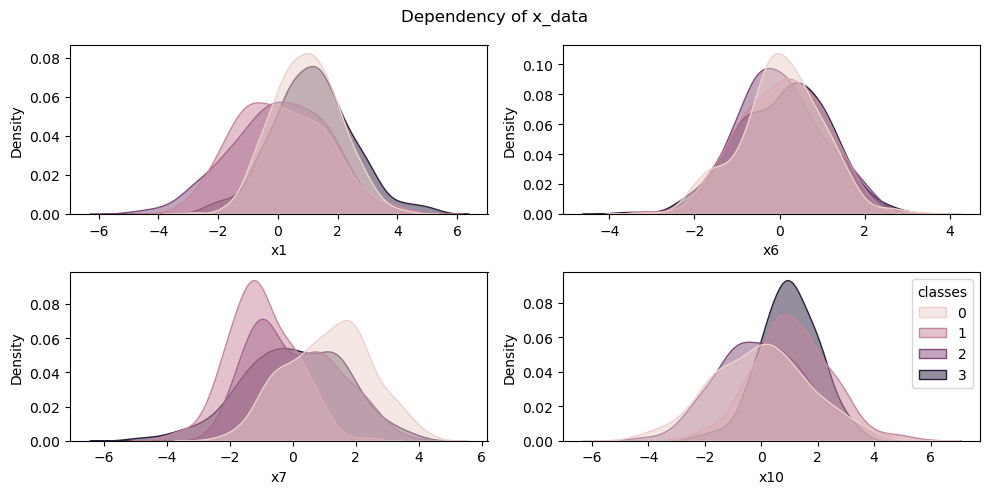

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)
fig.suptitle('Classes dependency with x_data')
sns.kdeplot(ax = axes[0,0], data = df, x = 'x1', hue = "classes", alpha = 0.5, shade = True)
axes[0,0].set_xlabel("x1")
axes[0,0].get_legend().remove()

sns.kdeplot(ax = axes[0,1], data = df, x = 'x6', hue = "classes", alpha = 0.5, shade = True)
axes[0,1].set_xlabel("x6")
axes[0,1].get_legend().remove()

sns.kdeplot(ax = axes[1,0], data = df, x = 'x7', hue = "classes", alpha = 0.5, shade = True)
axes[1,0].set_xlabel("x7")
axes[1,0].get_legend().remove()

sns.kdeplot(ax = axes[1,1], data = df, x = 'x10', hue = "classes", alpha = 0.5, shade = True)
axes[1,1].set_xlabel("x10")

plt.tight_layout()

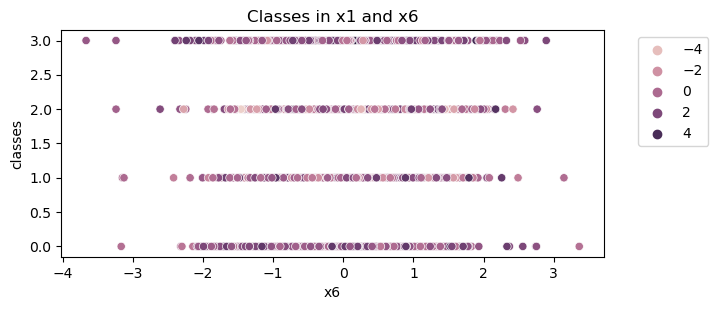

In [16]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x6', y = 'classes', hue = "x1")
plt.title("Classes in x1 with x6")
plt.xlabel("x6")
plt.ylabel("classes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

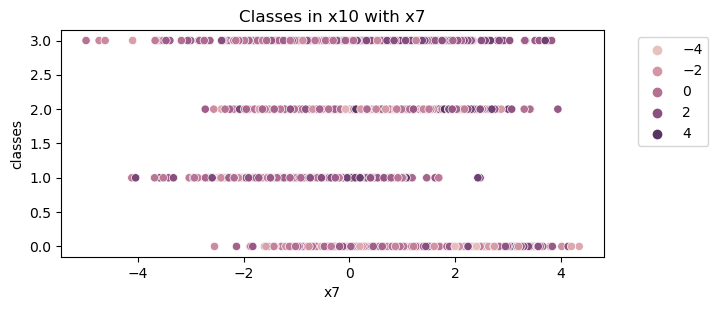

In [17]:
plt.figure(figsize = (7, 3), dpi = 100)
sns.scatterplot(data = df, x = 'x7', y = 'classes', hue = "x10")
plt.title("Classes in x10 with x7")
plt.xlabel("x7")
plt.ylabel("classes")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

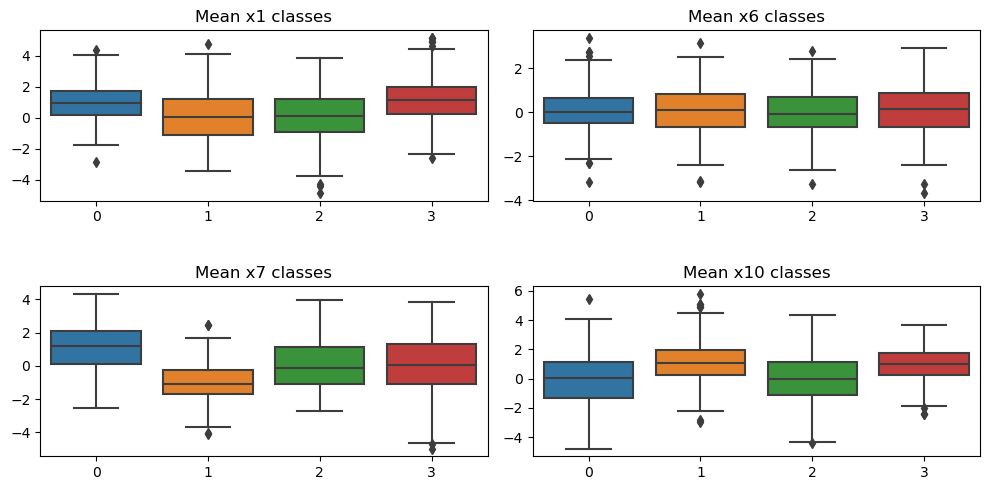

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10,5), dpi = 100)

sns.boxplot(ax = axes[0,0], data = df, x = "classes", y = 'x1')
axes[0,0].set_xlabel(None)
axes[0,0].set_ylabel(None)
axes[0,0].set_title("Mean x1 classes")

sns.boxplot(ax = axes[0,1], data = df, x = "classes", y = 'x6')
axes[0,1].set_xlabel(None)
axes[0,1].set_ylabel(None)
axes[0,1].set_title("Mean x6 classes")

sns.boxplot(ax = axes[1,0], data = df, x = "classes", y = 'x7')
axes[1,0].set_xlabel(None)
axes[1,0].set_ylabel(None)
axes[1,0].set_title("Mean x7 classes")

sns.boxplot(ax = axes[1,1], data = df, x = "classes", y = 'x10')
axes[1,1].set_xlabel(None)
axes[1,1].set_ylabel(None)
axes[1,1].set_title("Mean x10 classes")

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

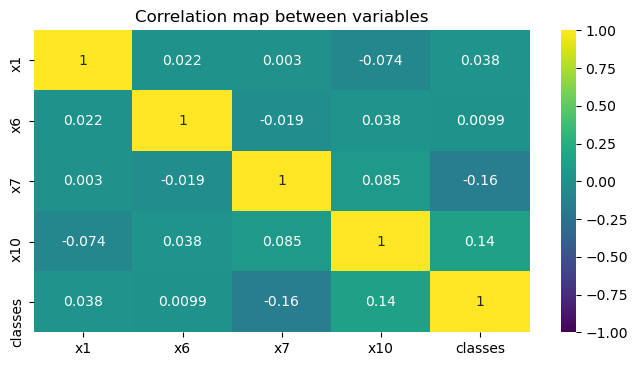

In [20]:
plt.figure(figsize = (8, 4), dpi = 100)
sns.heatmap(df.corr(), annot = True, cmap = "viridis", vmin = -1, vmax = 1)
plt.title("Correlation map between variables")
plt.show()

In [21]:
X = df.drop("classes", axis=1)
y = df["classes"]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Scaled_X_train = scaler.fit_transform(X_train)
Scaled_X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(Scaled_X_train, y_train)

LogisticRegression()

In [25]:
y_pred = log_model.predict(Scaled_X_test)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report

In [27]:
confusion_matrix(y_test, y_pred)

array([[50,  3,  8, 13],
       [ 1, 50,  9, 13],
       [ 8, 11, 39, 10],
       [23, 22, 10, 30]], dtype=int64)

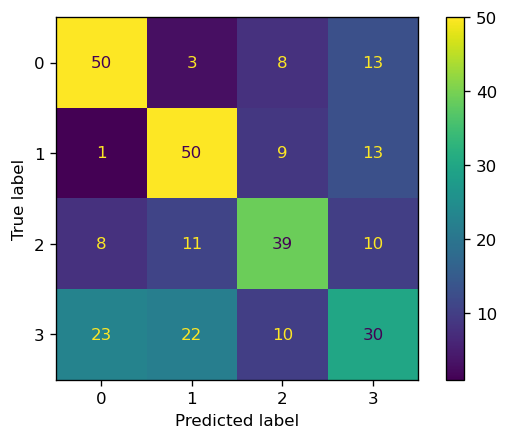

In [28]:
fig, ax = plt.subplots(dpi = 120)
plot_confusion_matrix(log_model, Scaled_X_test, y_test, ax = ax)

In [35]:
acc_score = accuracy_score(y_test, y_pred)
round(acc_score, 2)

0.56

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.68      0.64        74
           1       0.58      0.68      0.63        73
           2       0.59      0.57      0.58        68
           3       0.45      0.35      0.40        85

    accuracy                           0.56       300
   macro avg       0.56      0.57      0.56       300
weighted avg       0.55      0.56      0.56       300



In [ ]:
from sklearn.model_selection import GridSearchCV 
penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(0,20,50)
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
multi_class = ['ovr', 'multinomial']
l1_ratio = np.linspace(0, 1, 20)

param_grid = {
   'penalty': penalty,
    'C': C,
    'solver': solver,
    'multi_class': multi_class, 
    'l1_ratio': l1_ratio
}

grid_model = GridSearchCV(log_model, param_grid = param_grid)
grid_model.fit(Scaled_X_train, y_train)